# Capstone: Bitcoin: Time Series Forecasting Using Machine Learning

# 2. Exploratory Data Analysis
------

## Imports
---

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import _pickle as pickle
plt.style.use('ggplot')

In [10]:
# with open("exog_bitcoin.pickle",'rb') as fp:
#     df = pickle.load(fp)

In [13]:
with open("combined_.pickle",'rb') as fp:
    df = pickle.load(fp)

In [103]:
df.shape

(3974, 111)

In [14]:
df.head()

market_mvrv_more_155         ma128          ma14         ma200  \
t                                                                            
2010-01-01                   NaN  4.313379e+09  4.463299e+09  4.306751e+09   
2010-01-02                   NaN  4.319516e+09  4.519409e+09  4.310678e+09   
2010-01-03                   NaN  4.325653e+09  4.575520e+09  4.314606e+09   
2010-01-04                   NaN  4.331790e+09  4.631631e+09  4.318534e+09   
2010-01-05                   NaN  4.337927e+09  4.687741e+09  4.322461e+09   

                    ma25          ma40          ma60           ma9  \
t                                                                    
2010-01-01  4.389233e+09  4.353883e+09  2.169753e+09  4.556816e+09   
2010-01-02  4.420655e+09  4.373522e+09  2.176318e+09  4.644100e+09   
2010-01-03  4.452077e+09  4.393161e+09  2.182929e+09  4.731383e+09   
2010-01-04  4.483499e+09  4.412799e+09  2.189539e+09  4.818666e+09   
2010-01-05  4.514921e+09  4.432438e+09  2.196157e+09  4.905949e+09   

                    ma90  addresses_accumulation_balance  ...  \
t                                                         ...   
2010-01-01  4.321152e+09                        70018.15  ...   
2010-01-02  4.329881e+09                        70018.15  ...   
2010-01-03  4.338609e+09                        70018.15  ...   
2010-01-04  4.347337e+09                        90722.50  ...   
2010-01-05  4.356065e+09                        90722.50  ...   

            market_price_usd_close  addresses_non_zero_count  indicators_nvt  \
t                                                                              
2010-01-01                     NaN                   29959.0             NaN   
2010-01-02                     NaN                   30085.0             NaN   
2010-01-03                     NaN                   30271.0             NaN   
2010-01-04                     NaN                   30372.0             NaN   
2010-01-05                     NaN                   30570.0             NaN   

            entities_active_count  \
t                                   
2010-01-01                    4.0   
2010-01-02                    0.0   
2010-01-03                    0.0   
2010-01-04                    5.0   
2010-01-05                    0.0   

            derivatives_futures_volume_daily_perpetual_sum  \
t                                                            
2010-01-01                                             NaN   
2010-01-02                                             NaN   
2010-01-03                                             NaN   
2010-01-04                                             NaN   
2010-01-05                                             NaN   

            indicators_net_unrealized_profit_loss  \
t                                                   
2010-01-01                                    NaN   
2010-01-02                                    NaN   
2010-01-03                                    NaN   
2010-01-04                                    NaN   
2010-01-05                                    NaN   

            addresses_receiving_from_exchanges_count  supply_current  \
t                                                                      
2010-01-01                                       0.0       1631150.0   
2010-01-02                                       0.0       1637400.0   
2010-01-03                                       0.0       1646700.0   
2010-01-04                                       0.0       1655750.0   
2010-01-05                                       0.0       1665650.0   

            transactions_transfers_to_exchanges_count  \
t                                                       
2010-01-01                                        NaN   
2010-01-02                                        NaN   
2010-01-03                                        NaN   
2010-01-04                                        NaN   
2010-01-05                                 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3974 entries, 2010-01-01 00:00:00 to 2020-11-17 07:50:00
Columns: 111 entries, market_mvrv_more_155 to indicators_sopr_less_155
dtypes: float64(111)
memory usage: 3.4 MB


In [ ]:
# Using plotly to get a graph with the slider to adjust the time frame

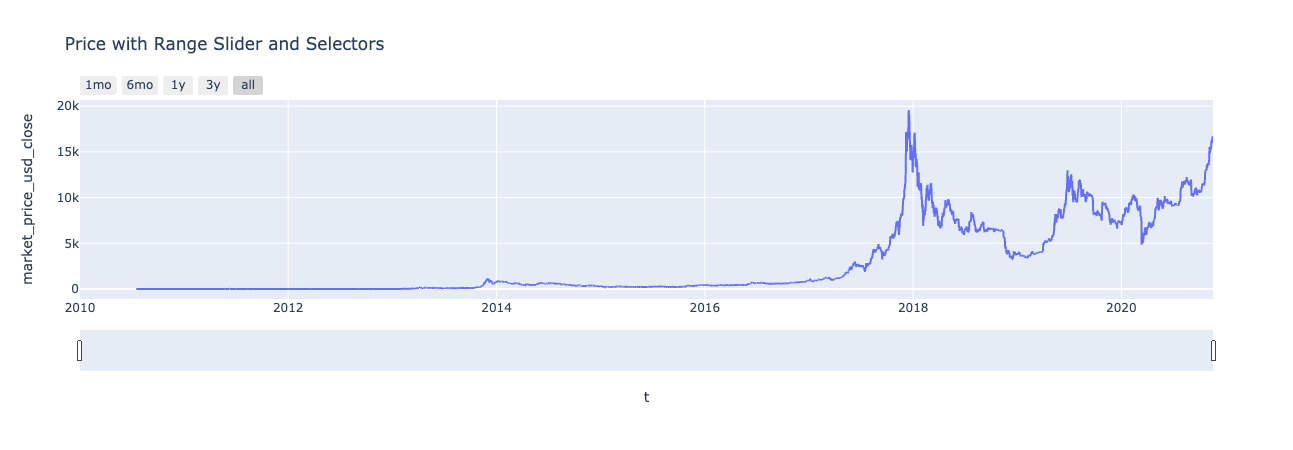

In [16]:
import plotly.express as px

fig = px.line(df, x=df.index, y='market_price_usd_close', title='Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1mo", step="month", stepmode="backward"),
            dict(count=6, label="6mo", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

Using markers to highlight significant areas of change in prices.

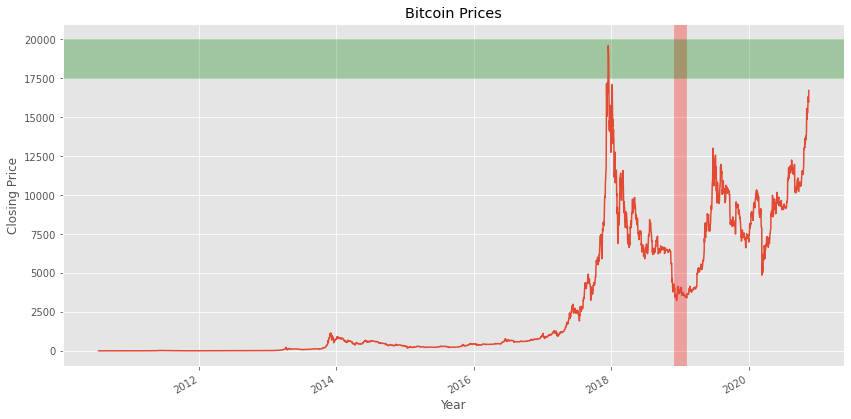

In [17]:
ax = df['market_price_usd_close'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

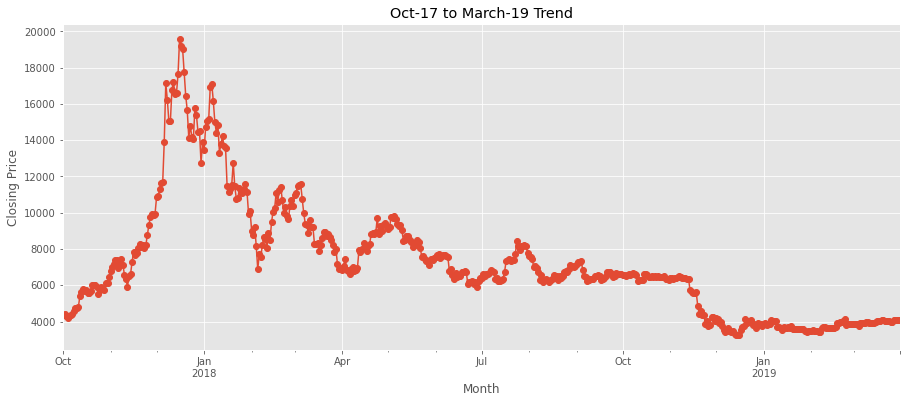

In [18]:
#Zooming in

ax = df.loc['2017-10':'2019-03','market_price_usd_close'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Closing Price');

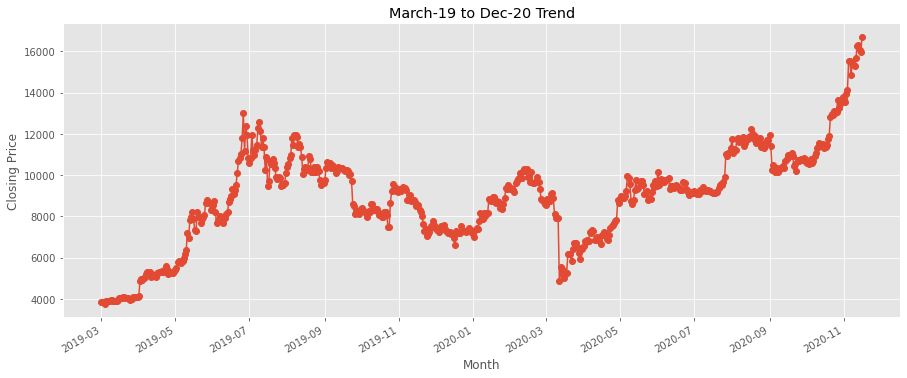

In [24]:
#Zooming in

ax = df.loc['2019-03':'2020-12','market_price_usd_close'].plot(marker='o', linestyle='-',figsize=(15,6), title="March-19 to Dec-20 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Closing Price');

Including markers for the Bitcoin Halvings:

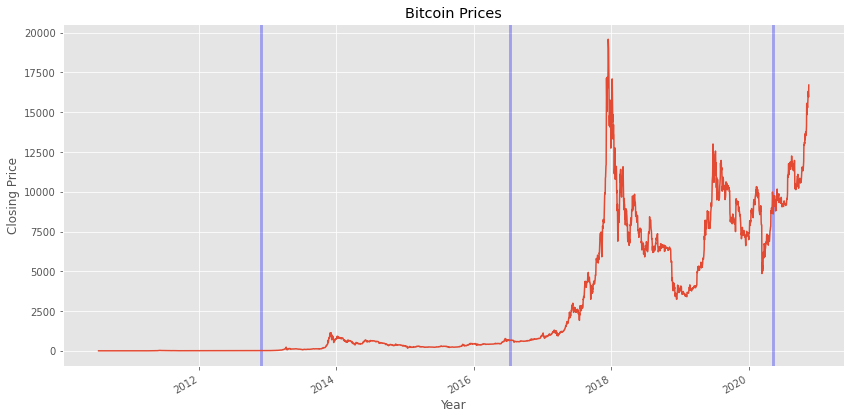

In [42]:
ax = df['market_price_usd_close'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)
# ax.axhspan(17500,20000, color='green',alpha=0.3)

Taking the log of the same features:

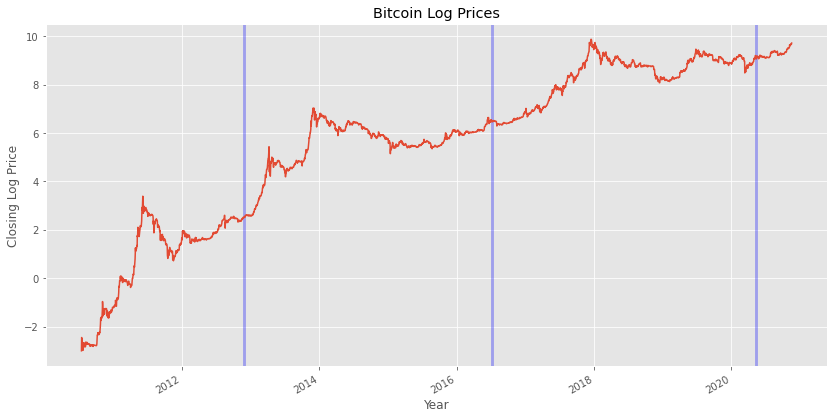

In [43]:
ax = np.log(df['market_price_usd_close']).plot(title='Bitcoin Log Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Log Price')
ax.set_yticks()

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)
# ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
# ax.axhspan(17500,20000, color='green',alpha=0.3)

There seems to be a relationship between the halving dates and the subsequent prices.

<AxesSubplot:>

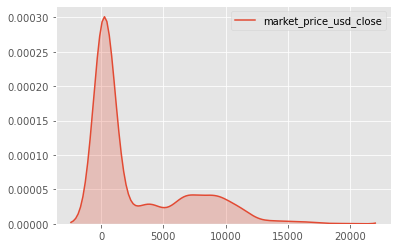

In [19]:
sns.kdeplot(df['market_price_usd_close'], shade=True)

<a id="subsection-two"></a>

# Visualizing using Lag Plots

Lag plot are used to observe the autocorrelation. These are crucial when we try to correct the trend and stationarity and we have to use smoothing functions. Lag plot helps us to understand the data better.

No handles with labels found to put in legend.


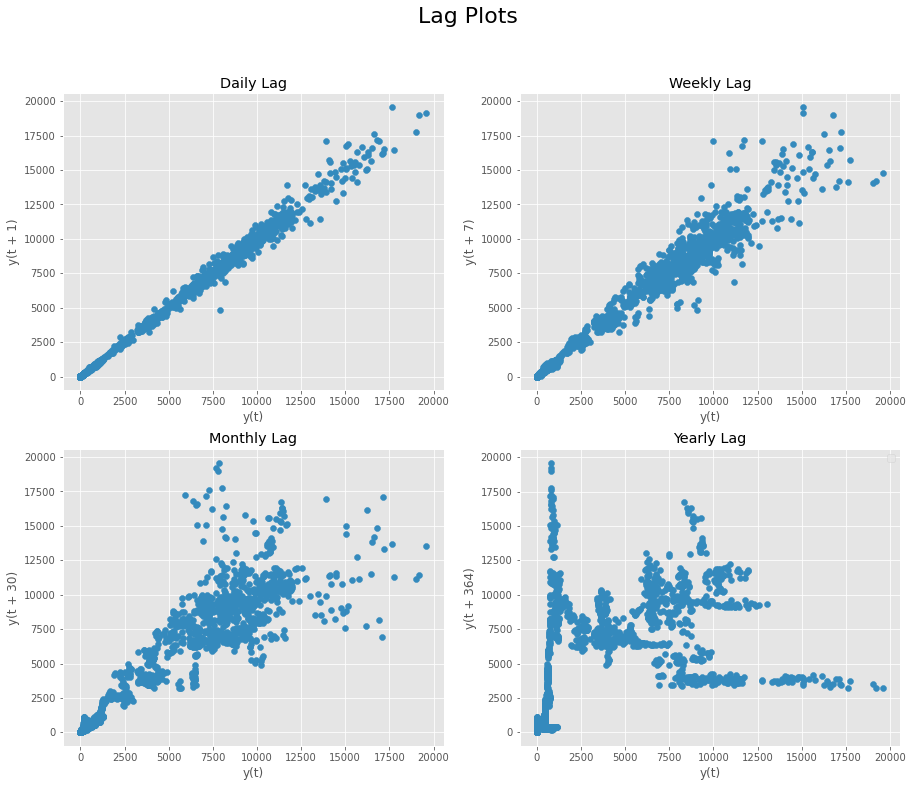

In [20]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(2,2,1)
pd.plotting.lag_plot(df['market_price_usd_close'], lag=1) #daily lag
plt.title('Daily Lag')

plt.subplot(2,2,2)
pd.plotting.lag_plot(df['market_price_usd_close'], lag=7) #weekly lag
plt.title('Weekly Lag')

plt.subplot(2,2,3)
pd.plotting.lag_plot(df['market_price_usd_close'], lag=30) #monthly lag
plt.title('Monthly Lag')

plt.subplot(2,2,4)
pd.plotting.lag_plot(df['market_price_usd_close'], lag=364) #yearly lag
plt.title('Yearly Lag')


plt.legend()
plt.show()

We can see that there is a positive correlation for daily, weekly and monthly lag plots. We observe almost no correlation for yearly lag plots.

# Simple Candlestick Graph

In [21]:
plot_ = df

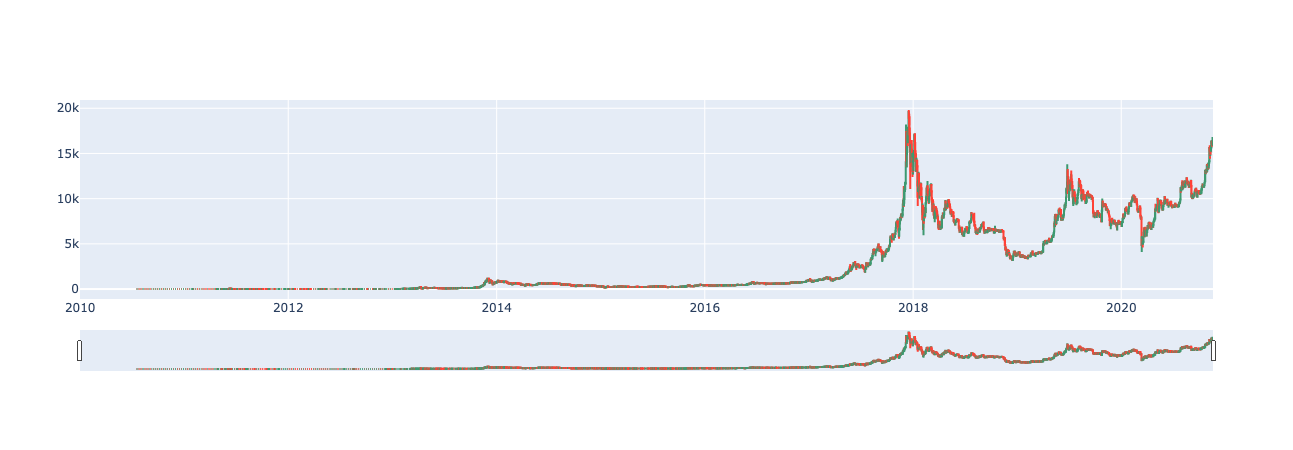

In [23]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['Open'],
                    high=plot_['High'],
                    low=plot_['Low'],
                    close=plot_['Close']))
fig.show()

### Look into potential predictive variables

# S2F: Stock to Flow ratio

"The Stock to Flow (S/F) Ratio is a popular model that assumes that scarcity drives value. Stock to Flow is defined as the ratio of the current stock of a commodity (i.e. circulating Bitcoin supply) and the flow of new production (i.e. newly mined bitcoins). Bitcoin's price has historically followed the S/F Ratio and therefore it is a model that can be used to predict future Bitcoin valuations. This metric was first coined by PlanB. For a detailed description see this article: https://medium.com/@100trillionUSD/modeling-bitcoins-value-with-scarcity-91fa0fc03e25"

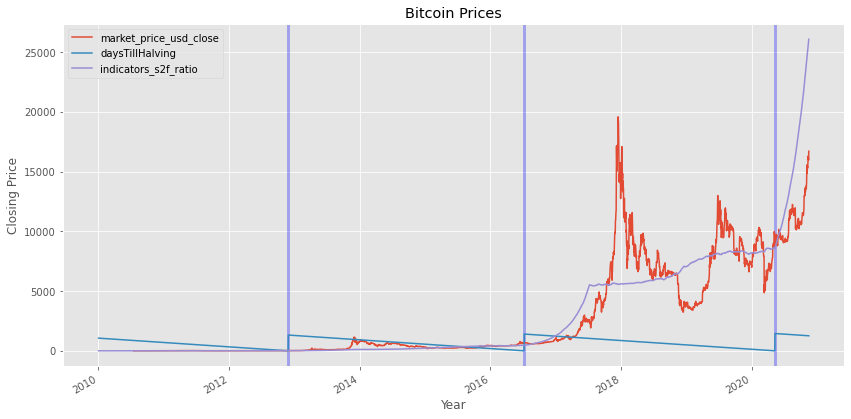

In [46]:
ax = df[['market_price_usd_close', 'daysTillHalving','indicators_s2f_ratio']].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)

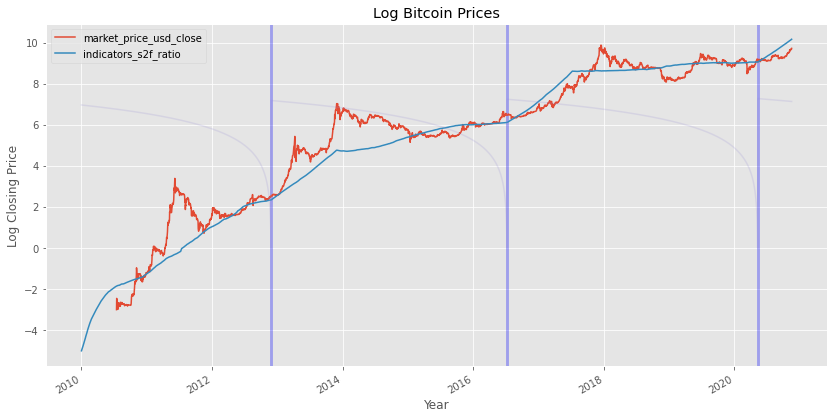

In [85]:
ax = np.log(df[['market_price_usd_close', 'indicators_s2f_ratio']]).plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax = np.log(df['daysTillHalving']).plot(title='Log Bitcoin Prices', grid=True, figsize=(14,7), alpha=0.2)
ax.set_xlabel('Year')
ax.set_ylabel('Log Closing Price')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)

It seems to hold pretty well but not very accurately against prices.

In [ ]:
# Active Addresses

In [56]:
address_col = [i for i in df.columns if 'address' in i]
address_col

['addresses_accumulation_balance',
 'addresses_new_non_zero_count',
 'addresses_accumulation_count',
 'addresses_min_1k_count',
 'addresses_profit_relative',
 'addresses_min_10k_count',
 'addresses_count',
 'addresses_sending_to_exchanges_count',
 'addresses_active_count',
 'addresses_non_zero_count',
 'addresses_receiving_from_exchanges_count']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



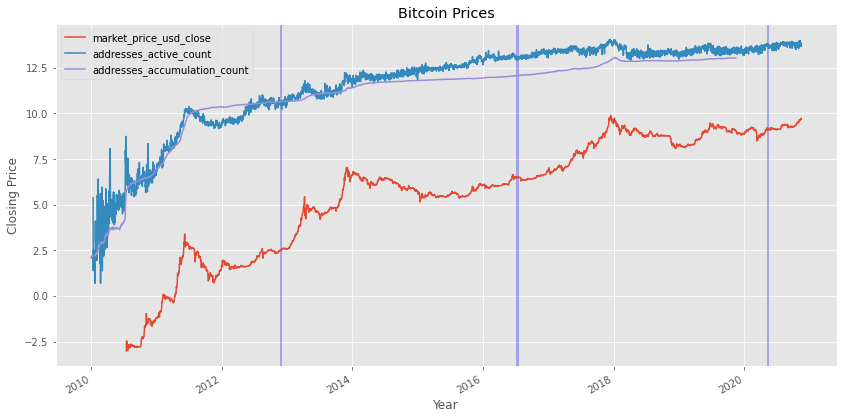

In [69]:
ax = np.log(df[['market_price_usd_close', 'addresses_active_count','addresses_accumulation_count']]).plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)

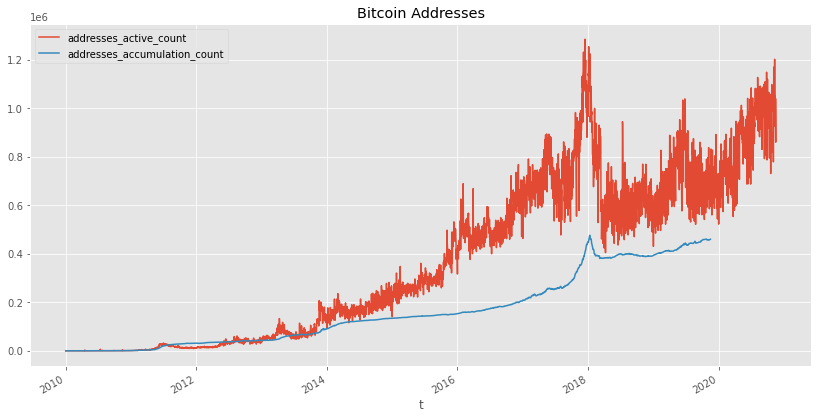

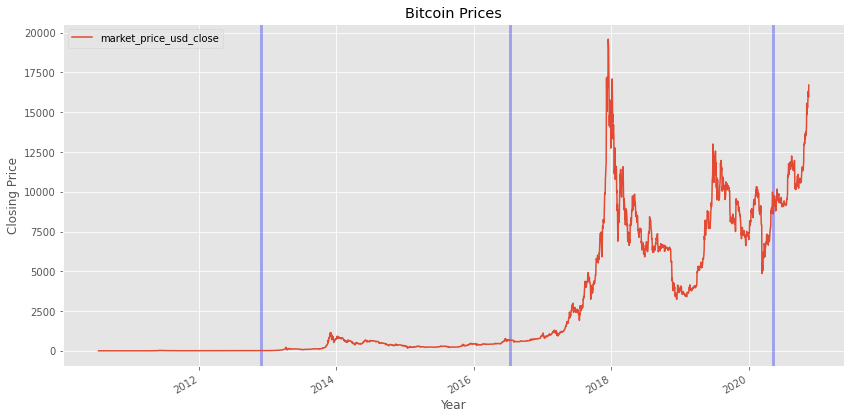

In [101]:
ax = df[['addresses_active_count','addresses_accumulation_count']].plot(title='Bitcoin Addresses', grid=True, figsize=(14,7))
ax = df[['market_price_usd_close']].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))

ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)

In [ ]:
# Miners

In [88]:
mining_col = [i for i in df.columns if 'mining' in i]
mining_col

['mining_revenue_sum',
 'mining_marketcap_thermocap_ratio',
 'mining_hash_rate_mean',
 'mining_revenue_from_fees',
 'mining_volume_mined_sum',
 'mining_miners_outflow_multiple',
 'mining_miners_unspent_supply',
 'mining_thermocap',
 'mining_difficulty_latest']

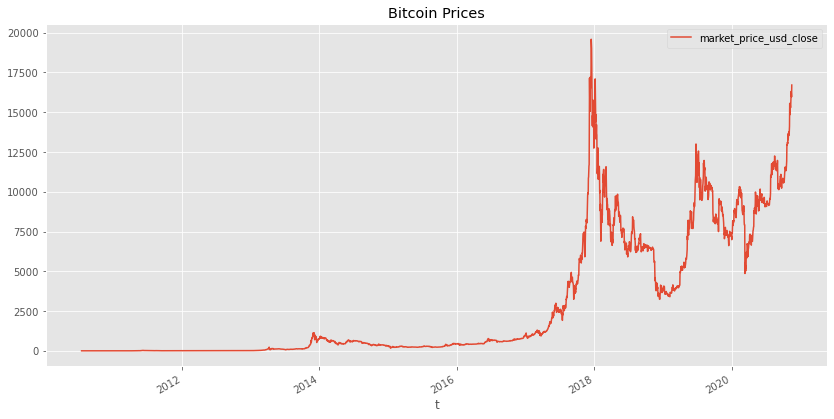

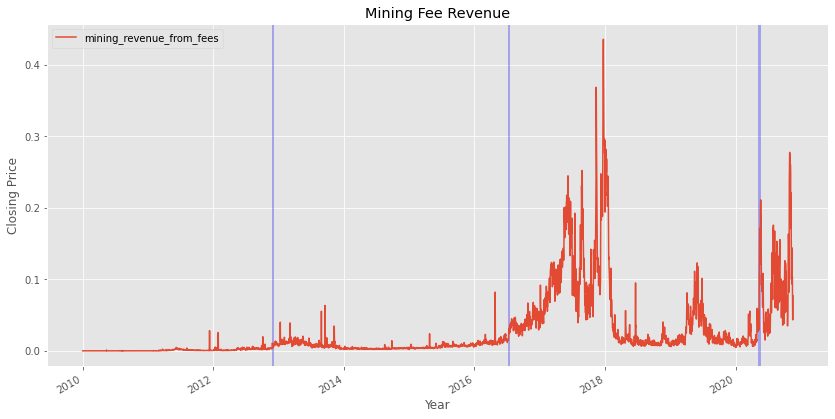

In [102]:

ax = df[['market_price_usd_close']].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax = df[['mining_revenue_from_fees']].plot(title='Mining Fee Revenue', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



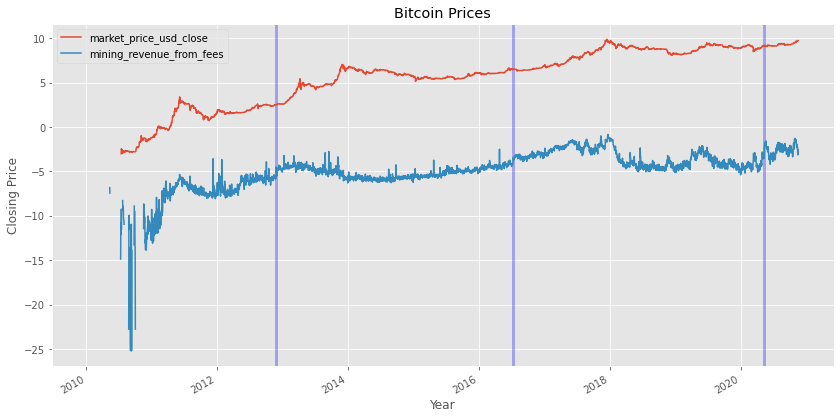

In [105]:
ax = np.log(df[['market_price_usd_close', 'mining_revenue_from_fees']]).plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)

Mining revenue and activity seems to have some correlation as well.

In [107]:
market_cols = [i for i in df.columns if 'market' in i]
market_cols

['market_mvrv_more_155',
 'market_mvrv',
 'market_marketcap_usd',
 'mining_marketcap_thermocap_ratio',
 'market_price_drawdown_relative',
 'market_price_realized_usd',
 'market_mvrv_less_155',
 'market_mvrv_z_score',
 'market_marketcap_realized_usd',
 'market_price_usd_close']

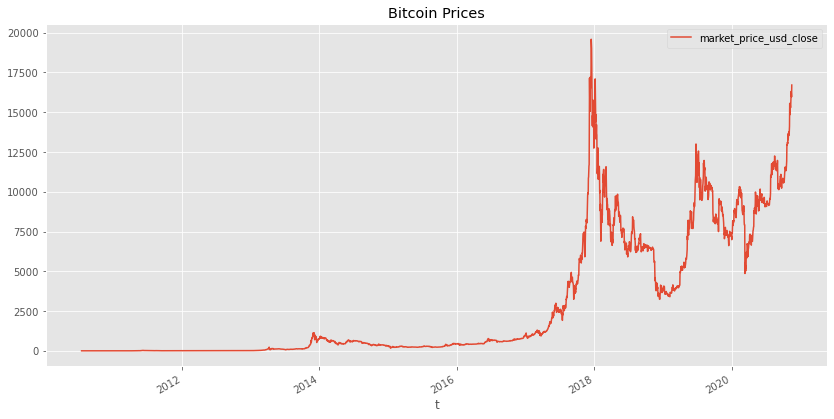

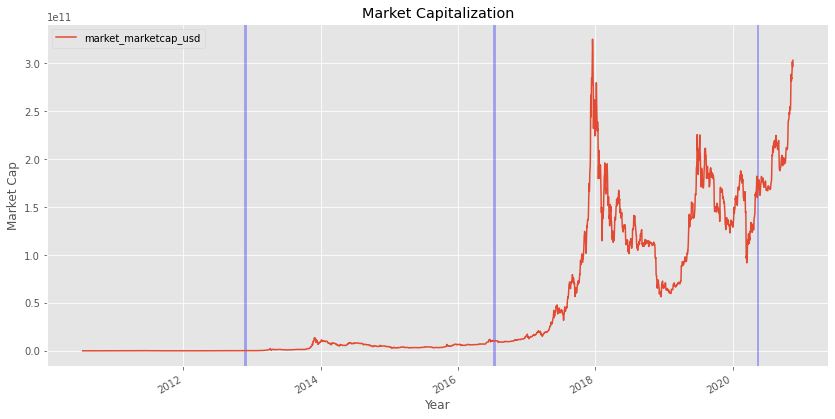

In [110]:
ax = df[['market_price_usd_close']].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax = df[['market_marketcap_usd']].plot(title='Market Capitalization', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Market Cap')

ax.axvspan('2012-11-23','2012-11-30',color='blue', alpha=0.3)
ax.axvspan('2016-07-04','2016-07-15',color='blue', alpha=0.3)
ax.axvspan('2020-05-07','2020-05-15',color='blue', alpha=0.3)

In [112]:
df.describe().T

count          mean           std  \
market_mvrv_more_155                       3255.0  6.515791e+00  1.392126e+01   
ma128                                      3973.0  1.036209e+22  1.974954e+22   
ma14                                       3973.0  1.150233e+22  2.144747e+22   
ma200                                      3973.0  9.708439e+21  1.877267e+22   
ma25                                       3973.0  1.139486e+22  2.130041e+22   
...                                           ...           ...           ...   
indicators_net_unrealized_profit_loss      3775.0  3.146679e-01  3.177655e-01   
addresses_receiving_from_exchanges_count   3607.0  1.179633e+04  1.407426e+04   
supply_current                             3973.0  1.296950e+07  4.697116e+06   
transactions_transfers_to_exchanges_count  3380.0  2.454251e+04  2.641861e+04   
indicators_sopr_less_155                   3409.0  1.016007e+00  8.427407e-02   

                                                    min           25%  \
market_mvrv_more_155                       3.475576e-01  1.109141e+00   
ma128                                      4.313379e+09  8.486672e+15   
ma14                                       4.463299e+09  1.167521e+16   
ma200                                      4.306751e+09  7.849979e+15   
ma25                                       4.389233e+09  1.119394e+16   
...                                                 ...           ...   
indicators_net_unrealized_profit_loss     -1.556947e+00  1.788311e-01   
addresses_receiving_from_exchanges_count   0.000000e+00  6.300000e+01   
supply_current                             1.631150e+06  9.987450e+06   
transactions_transfers_to_exchanges_count  0.000000e+00  2.263750e+03   
indicators_sopr_less_155                   5.963856e-01  9.894334e-01   

                                                    50%           75%  \
market_mvrv_more_155                       2.066703e+00  6.707548e+00   
ma128                                      2.023254e+20  8.436000e+21   
ma14                                       2.092694e+20  1.267234e+22   
ma200                                      1.928944e+20  6.973788e+21   
ma25                                       2.078274e+20  1.238905e+22   
...                                                 ...           ...   
indicators_net_unrealized_profit_loss      3.894521e-01  5.302047e-01   
addresses_receiving_from_exchanges_count   4.468000e+03  2.200400e+04   
supply_current                             1.425970e+07  1.689038e+07   
transactions_transfers_to_exchanges_count  2.310850e+04  3.960950e+04   
indicators_sopr_less_155                   1.004087e+00  1.024347e+00   

                                                    max  
market_mvrv_more_155                       1.955778e+02  
ma128                                      7.718007e+22  
ma14                                       8.588790e+22  
ma200                                      7.318212e+22  
ma25                                       8.492686e+22  
...                                                 ...  
indicators_net_unrealized_profit_loss      8.779670e-01  
addresses_receiving_from_exchanges_count   8.792500e+04  
supply_current                             1.854541e+07  
transactions_transfers_to_exchanges_count  2.692280e+05  
indicators_sopr_less_155                   2.897287e+00  

[111 rows x 8 columns]

In [113]:
df.corr()[['Close']].sort_values('Close', ascending = False)

Close
market_price_usd_close        1.000000
Close                         1.000000
High                          0.999322
Low                           0.999146
Open                          0.998532
...                                ...
mining_miners_unspent_supply -0.511685
mining_volume_mined_sum      -0.530985
mining_revenue_sum           -0.589858
open_interest                      NaN
daily_volume                       NaN

[111 rows x 1 columns]

In [116]:
abs(df.corr()[['Close']].sort_values('Close', ascending = False)).head(40)

Close
market_price_usd_close                       1.000000
Close                                        1.000000
High                                         0.999322
Low                                          0.999146
Open                                         0.998532
market_marketcap_usd                         0.998400
market_price_realized_usd                    0.931712
market_marketcap_realized_usd                0.929793
addresses_non_zero_count                     0.908333
addresses_count                              0.889331
indicators_s2f_ratio                         0.877112
addresses_accumulation_count                 0.868473
mining_thermocap                             0.856626
distribution_balance_exchanges               0.854398
addresses_sending_to_exchanges_count         0.823229
addresses_active_count                       0.815238
mining_hash_rate_mean                        0.809963
addresses_receiving_from_exchanges_count     0.809236
ma30                                         0.807193
mining_difficulty_latest                     0.806435
ma9                                          0.804942
ma14                                         0.804181
ma25                                         0.802162
ma40                                         0.798554
transactions_transfers_from_exchanges_count  0.794190
ma60                                         0.793377
addresses_new_non_zero_count                 0.790826
blockchain_block_height                      0.787625
ma90                                         0.786607
ma128                                        0.780050
ma200                                        0.770149
transactions_size_sum                        0.761221
blockchain_block_size_mean                   0.759194
transactions_transfers_to_exchanges_count    0.755618
blockchain_utxo_spent_count                  0.754159
blockchain_utxo_created_count                0.733927
transactions_rate                            0.731985
transactions_count                           0.731985
entities_new_count                           0.726638
entities_active_count                        0.702417

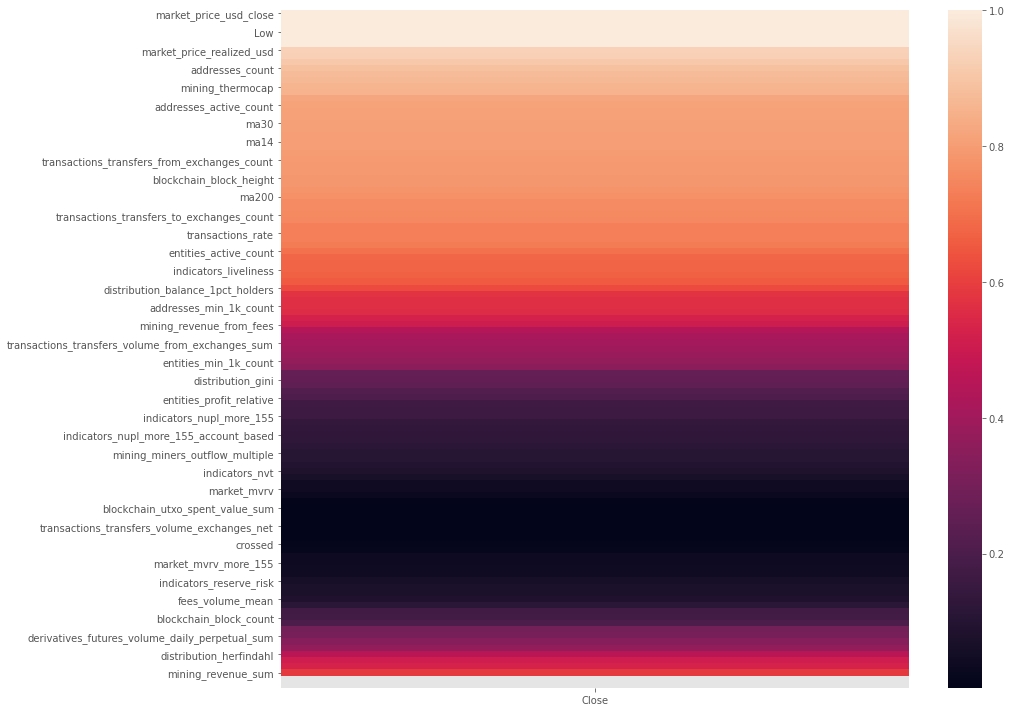

In [118]:
plt.figure(figsize = (15, 10))
sns.heatmap(abs(df.corr()[['Close']].sort_values('Close', ascending = False)))
plt.tight_layout()

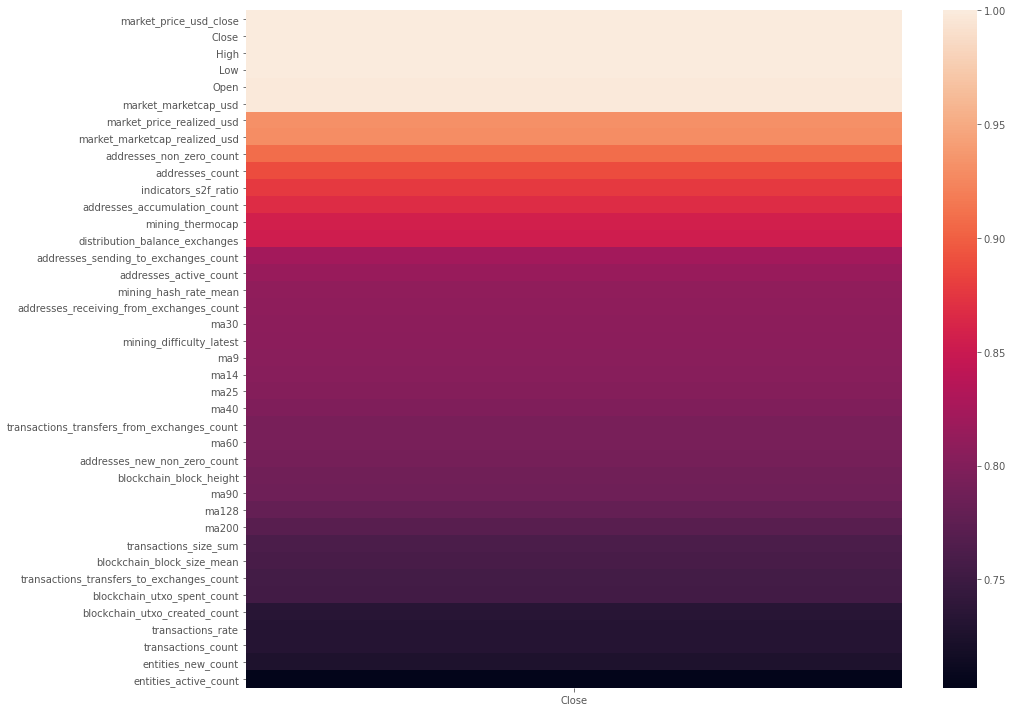

In [117]:
plt.figure(figsize = (15, 10))
sns.heatmap(abs(df.corr()[['Close']].sort_values('Close', ascending = False)).head(40))
plt.tight_layout()

Among the top variables with highest correlation with price, a lot of them are market-related metrics or versions of price themselves.
So let's take them out and take a look at the correlations.

In [128]:
no_market_cols = [i for i in df.columns if 'market' not in i]
no_market_cols.remove('Low')
no_market_cols.remove('High')
no_market_cols.remove('Open')
no_market_cols

['ma128',
 'ma14',
 'ma200',
 'ma25',
 'ma40',
 'ma60',
 'ma9',
 'ma90',
 'addresses_accumulation_balance',
 'supply_current_adjusted',
 'addresses_new_non_zero_count',
 'open_interest',
 'mining_revenue_sum',
 'indicators_sopr_account_based',
 'indicators_sopr_adjusted',
 'transactions_rate',
 'addresses_accumulation_count',
 'derivatives_futures_open_interest_all_sum',
 'derivatives_futures_funding_rate_perpetual',
 'distribution_herfindahl',
 'entities_receiving_count',
 'distribution_gini',
 'blockchain_block_interval_mean',
 'indicators_nvts',
 'derivatives_futures_open_interest_perpetual_sum',
 'mining_hash_rate_mean',
 'derivatives_futures_volume_daily_all_sum',
 'blockchain_utxo_spent_count',
 'transactions_transfers_volume_from_exchanges_sum',
 'addresses_min_1k_count',
 'supply_active_more_1y_percent',
 'transactions_transfers_volume_to_exchanges_sum',
 'indicators_puell_multiple',
 'transactions_transfers_volume_entity_adjusted_sum',
 'transactions_transfers_volume_exchanges

In [129]:
abs(df[no_market_cols].corr()[['Close']].sort_values('Close', ascending = False)).head(40)

Close
Close                                        1.000000
addresses_non_zero_count                     0.908333
addresses_count                              0.889331
indicators_s2f_ratio                         0.877112
addresses_accumulation_count                 0.868473
mining_thermocap                             0.856626
distribution_balance_exchanges               0.854398
addresses_sending_to_exchanges_count         0.823229
addresses_active_count                       0.815238
mining_hash_rate_mean                        0.809963
addresses_receiving_from_exchanges_count     0.809236
ma30                                         0.807193
mining_difficulty_latest                     0.806435
ma9                                          0.804942
ma14                                         0.804181
ma25                                         0.802162
ma40                                         0.798554
transactions_transfers_from_exchanges_count  0.794190
ma60                                         0.793377
addresses_new_non_zero_count                 0.790826
blockchain_block_height                      0.787625
ma90                                         0.786607
ma128                                        0.780050
ma200                                        0.770149
transactions_size_sum                        0.761221
blockchain_block_size_mean                   0.759194
transactions_transfers_to_exchanges_count    0.755618
blockchain_utxo_spent_count                  0.754159
blockchain_utxo_created_count                0.733927
transactions_rate                            0.731985
transactions_count                           0.731985
entities_new_count                           0.726638
entities_active_count                        0.702417
transactions_entity_adjusted_count           0.679633
entities_receiving_count                     0.674677
indicators_liveliness                        0.674610
supply_current                               0.667947
indicators_liveliness_account_based          0.654407
distribution_balance_1pct_holders            0.624914
indicators_realized_profit                   0.573580

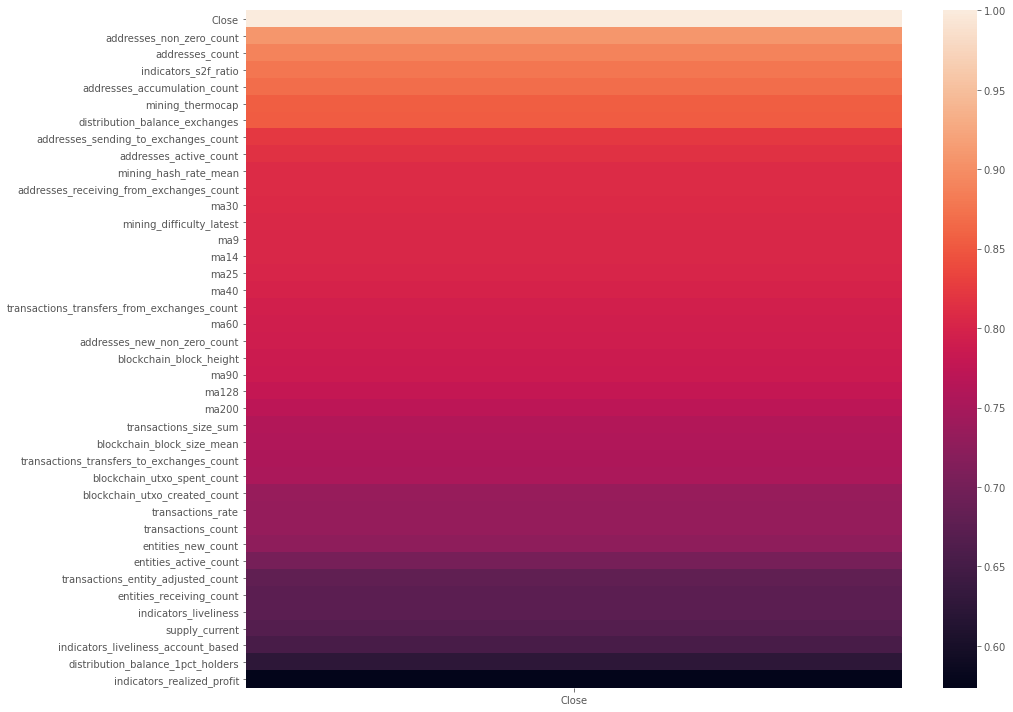

In [130]:
plt.figure(figsize = (15, 10))
sns.heatmap(abs(df[no_market_cols].corr()[['Close']].sort_values('Close', ascending = False)).head(40))
plt.tight_layout()

As it was hypothesized in the beginning of the project, fundamental indicators related to addresses, mining, and transactions have high correlations with price. Some engineered individual indicators also seem hold some relationship with price.

In [131]:
abs(df[no_market_cols].corr()[['Close']].sort_values('Close', ascending = False)).head(20)

Close
Close                                        1.000000
addresses_non_zero_count                     0.908333
addresses_count                              0.889331
indicators_s2f_ratio                         0.877112
addresses_accumulation_count                 0.868473
mining_thermocap                             0.856626
distribution_balance_exchanges               0.854398
addresses_sending_to_exchanges_count         0.823229
addresses_active_count                       0.815238
mining_hash_rate_mean                        0.809963
addresses_receiving_from_exchanges_count     0.809236
ma30                                         0.807193
mining_difficulty_latest                     0.806435
ma9                                          0.804942
ma14                                         0.804181
ma25                                         0.802162
ma40                                         0.798554
transactions_transfers_from_exchanges_count  0.794190
ma60                                         0.793377
addresses_new_non_zero_count                 0.790826

We will see if these top variables are consistent with features that are extracted with Random Forest or Extra Trees with feature importance.